### Description du dataset : 
Ce dataset est un ensemble de données de ressources humaines (RH) qui contient diverses informations sur les employés d'une organisation.  Globalement, ce dataset pourrait être utilisé pour analyser les performances, la satisfaction, les absences, et d'autres aspects pertinents des employés dans le cadre des ressources humaines. Il permettrait aux gestionnaires RH de prendre des décisions éclairées concernant la gestion du personnel, les promotions, les augmentations salariales, les formations.


In [3]:
# Chargement des librairies 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import numpy as np
import scipy
import sklearn

In [4]:
# Chargement du fichier CSV
df = pd.read_csv('HRDataset_v14.csv')

In [5]:
# Afficher les premières lignes
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [6]:
df.tail(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


#### Exploration des données

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

###### Les colonnes 'DateofTermination' et 'ManagerID' présentent des valeurs manquantes. 

###### Les colonnes sont composées de valeurs numériques (Entiers et Flottants) et catégorielles (Object).

In [8]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [9]:
# Traduire les colonnes en français
df.rename(columns={
    'Employee_Name': 'Nom_Employé',
    'EmpID': 'ID_Employé',
    'MarriedID': 'ID_Marié',
    'MaritalStatusID': ' ID_État_Civil',
    'GenderID': 'ID_Genre',
    'EmpStatusID': 'ID_Statut_Employé',
    'DeptID': 'ID_Département',
    'PerfScoreID': 'ID_Score_Performance',
    'FromDiversityJobFairID': 'ID_Foire_Emploi_Diversité',
    'Salary': 'Salaire',
    'Termd': 'Terminé',
    'PositionID': 'ID_Poste',
    'Position': 'Poste',
    'State': 'État',
    'Zip': 'Code_Postal',
    'DOB': 'Date_de_Naissance',
    'Sex': 'Sexe',
    'MaritalDesc': 'Description_État_Civil',
    'CitizenDesc': 'Description_Citoyenneté',
    'HispanicLatino': 'Hispano_Latino',
    'RaceDesc': 'Description_Race',
    'DateofHire': 'Date_Embauche',
    'DateofTermination': 'Date_de_Fin',
    'TermReason': 'Raison_de_Fin',
    'EmploymentStatus': 'Statut_Emploi',
    'Department': 'Département',
    'ManagerName': 'Nom_du_Manager',
    'ManagerID': 'ID_Manager',
    'RecruitmentSource': 'Source_de_Recrutement',
    'PerformanceScore': 'Score_de_Performance',
    'EngagementSurvey': 'Enquête_Engagement',
    'EmpSatisfaction': 'Satisfaction_Employé',
    'SpecialProjectsCount': 'Nombre_de_Projets_Spécial',
    'LastPerformanceReview_Date': 'Évaluation_Dernière_Performance',
    'DaysLateLast30': 'Retard_30_Derniers_Jours',
    'Absences': 'Absences'
}, inplace=True) 
    
    

In [10]:
df.columns

Index(['Nom_Employé', 'ID_Employé', 'ID_Marié', ' ID_État_Civil', 'ID_Genre',
       'ID_Statut_Employé', 'ID_Département', 'ID_Score_Performance',
       'ID_Foire_Emploi_Diversité', 'Salaire', 'Terminé', 'ID_Poste', 'Poste',
       'État', 'Code_Postal', 'Date_de_Naissance', 'Sexe',
       'Description_État_Civil', 'Description_Citoyenneté', 'Hispano_Latino',
       'Description_Race', 'Date_Embauche', 'Date_de_Fin', 'Raison_de_Fin',
       'Statut_Emploi', 'Département', 'Nom_du_Manager', 'ID_Manager',
       'Source_de_Recrutement', 'Score_de_Performance', 'Enquête_Engagement',
       'Satisfaction_Employé', 'Nombre_de_Projets_Spécial',
       'Évaluation_Dernière_Performance', 'Retard_30_Derniers_Jours',
       'Absences'],
      dtype='object')

<Axes: >

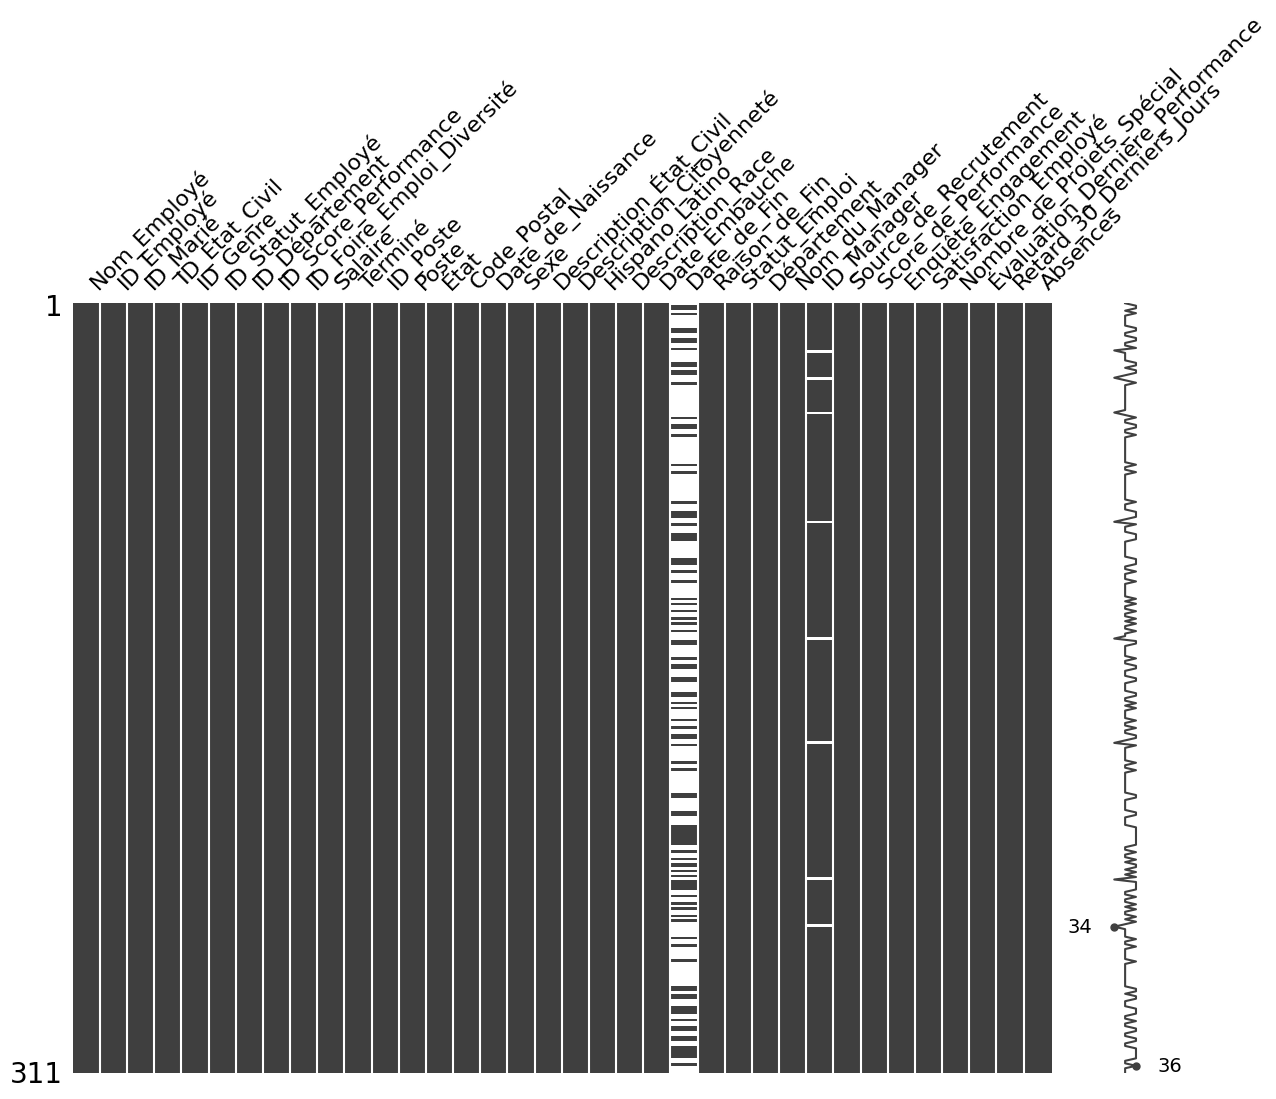

In [11]:
# Vérifier les valeurs manquantes avec mno
mno.matrix(df, figsize=(14, 10))

In [12]:
# Afficher le pourcentage des valeurs nulles dans chaque colonne
(df.isnull().sum()/df.shape[0])*100 

Nom_Employé                         0.000000
ID_Employé                          0.000000
ID_Marié                            0.000000
 ID_État_Civil                      0.000000
ID_Genre                            0.000000
ID_Statut_Employé                   0.000000
ID_Département                      0.000000
ID_Score_Performance                0.000000
ID_Foire_Emploi_Diversité           0.000000
Salaire                             0.000000
Terminé                             0.000000
ID_Poste                            0.000000
Poste                               0.000000
État                                0.000000
Code_Postal                         0.000000
Date_de_Naissance                   0.000000
Sexe                                0.000000
Description_État_Civil              0.000000
Description_Citoyenneté             0.000000
Hispano_Latino                      0.000000
Description_Race                    0.000000
Date_Embauche                       0.000000
Date_de_Fi

<Axes: >

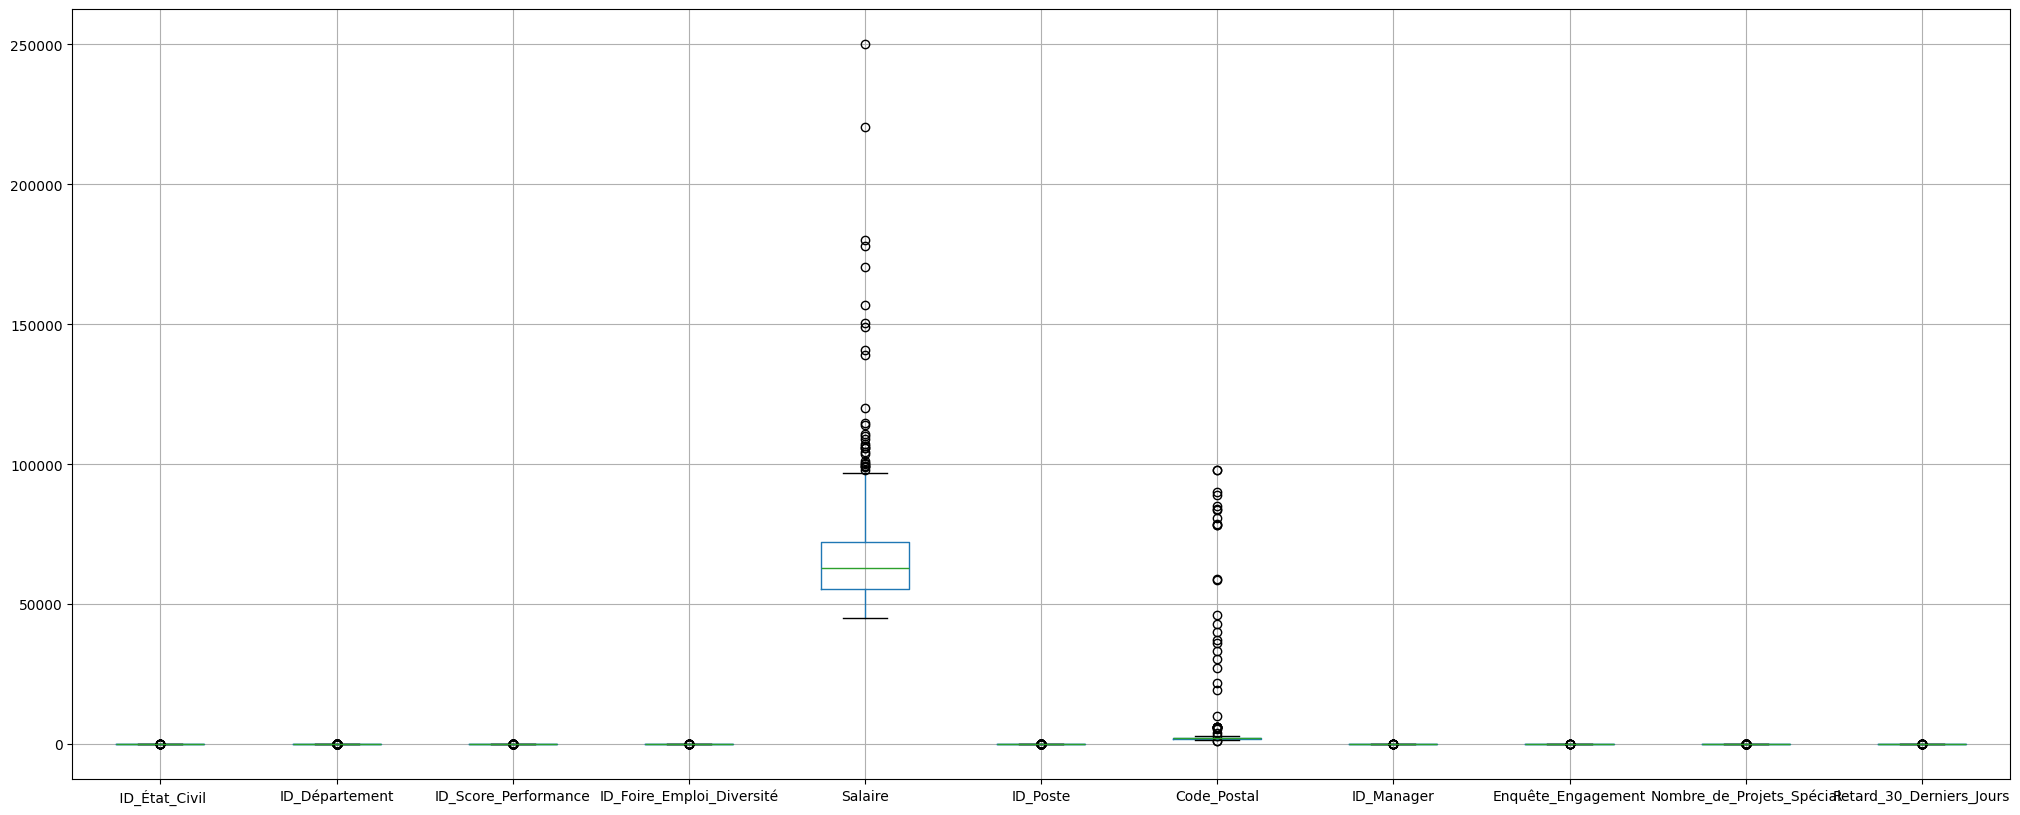

In [13]:
# Récupération des valeurs abérrantes
df[[' ID_État_Civil', 'ID_Département', 'ID_Score_Performance', 'ID_Foire_Emploi_Diversité',
    'Salaire', 'ID_Poste', 'Code_Postal', 'ID_Manager',
    'Enquête_Engagement', 'Nombre_de_Projets_Spécial', 'Retard_30_Derniers_Jours']].boxplot(figsize=(25, 10))  

In [14]:
# Définir une fonction pour calculer les outliers et leur pourcentage
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_percentage = len(outliers) / len(df) * 100
    return outliers_percentage

# Colonnes spécifiées pour l'analyse des outliers
columns_to_check = [
    ' ID_État_Civil', 'ID_Département', 'ID_Score_Performance', 'ID_Foire_Emploi_Diversité',
    'Salaire', 'ID_Poste', 'Code_Postal', 'ID_Manager', 'Enquête_Engagement',
    'Nombre_de_Projets_Spécial', 'Retard_30_Derniers_Jours'
]

# Calculer le pourcentage d'outliers pour chaque colonne
outliers_percentages = {column: calculate_outliers(df, column) for column in columns_to_check}
outliers_percentages

{' ID_État_Civil': 6.430868167202572,
 'ID_Département': 33.11897106109325,
 'ID_Score_Performance': 21.864951768488748,
 'ID_Foire_Emploi_Diversité': 9.32475884244373,
 'Salaire': 9.32475884244373,
 'ID_Poste': 28.617363344051448,
 'Code_Postal': 11.57556270096463,
 'ID_Manager': 4.180064308681672,
 'Enquête_Engagement': 2.8938906752411575,
 'Nombre_de_Projets_Spécial': 22.508038585209004,
 'Retard_30_Derniers_Jours': 10.610932475884244}

In [15]:
# Analyse descriptive des colonnes numériques
numerical_cols = df.select_dtypes(include=['number'])
numerical_description = numerical_cols.describe()

# Affichage des résultats
print("Analyse descriptive des colonnes numériques :")
numerical_description

Analyse descriptive des colonnes numériques :


,ID_Employé,ID_Marié,ID_État_Civil,ID_Genre,ID_Statut_Employé,ID_Département,ID_Score_Performance,ID_Foire_Emploi_Diversité,Salaire,Terminé,ID_Poste,Code_Postal,ID_Manager,Enquête_Engagement,Satisfaction_Employé,Nombre_de_Projets_Spécial,Retard_30_Derniers_Jours,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [16]:
# Analyse descriptive des colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object', 'category'])
categorical_description = categorical_cols.describe()

# Affichage des résultats
print("\nAnalyse descriptive des colonnes catégorielles :")
categorical_description


Analyse descriptive des colonnes catégorielles :


,Nom_Employé,Poste,État,Date_de_Naissance,Sexe,Description_État_Civil,Description_Citoyenneté,Hispano_Latino,Description_Race,Date_Embauche,Date_de_Fin,Raison_de_Fin,Statut_Emploi,Département,Nom_du_Manager,Source_de_Recrutement,Score_de_Performance,Évaluation_Dernière_Performance
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


In [17]:
# Génération de données avec 311 noms uniques
data = {
    'Nom_Employé': [f'Employé_{i}' for i in range(1, 312)],
    'ID_Genre': ['F', 'M'] * 155 + ['F'],
    'Département': ['Production', 'IT/IS', 'Software Engineering', 'Admin Offices', 'Sales', 'Executive Office'] * 103 + ['Production'],
    'ID_État_Civil': ['Single', 'Married', 'Divorced', 'Widowed', 'Separated'] * 103 + ['Married']
}

In [18]:
# Tableau croisé et visualisation
cross_tab = pd.crosstab(df['Département'], df['Sexe'])
print("\nTableau Croisé entre 'Département' et 'Sexe':")
print(cross_tab)


Tableau Croisé entre 'Département' et 'Sexe':
Sexe                    F  M 
Département                  
Admin Offices           6   3
Executive Office        1   0
IT/IS                  22  28
Production            126  83
Sales                  15  16
Software Engineering    6   5


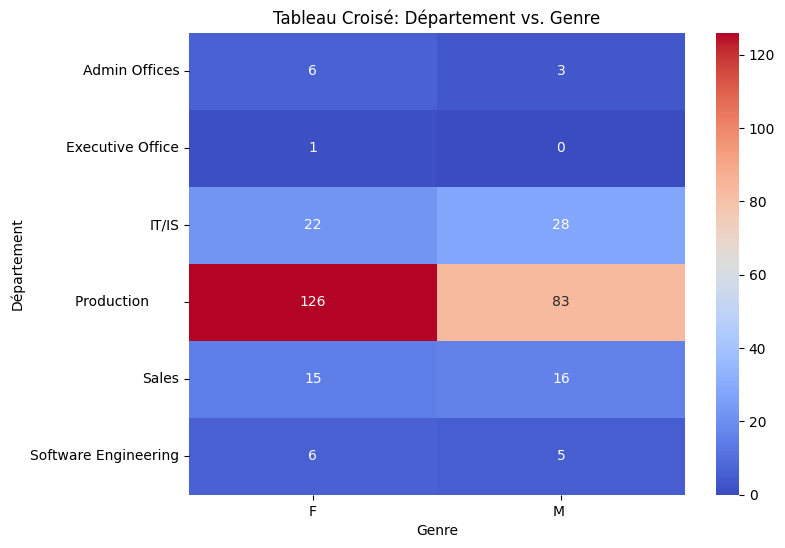

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Tableau Croisé: Département vs. Genre')
plt.xlabel('Genre')
plt.ylabel('Département')
plt.show()

In [20]:
# Croisement entre Salaire et sexe
cross_tab = pd.crosstab(df['Salaire'], df['Sexe'])
print("\nTableau Croisé entre 'Salaire' et 'Sexe':")
print(cross_tab)


Tableau Croisé entre 'Salaire' et 'Sexe':
Sexe     F  M 
Salaire       
45046    1   0
45069    1   0
45115    0   1
45395    1   0
45433    1   0
...     ..  ..
170500   0   1
178000   0   1
180000   1   0
220450   1   0
250000   1   0

[308 rows x 2 columns]


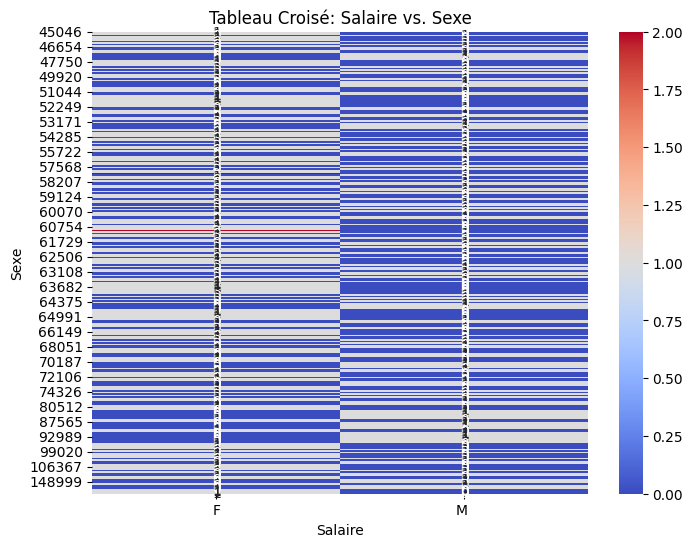

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Tableau Croisé: Salaire vs. Sexe')
plt.xlabel('Salaire')
plt.ylabel('Sexe')
plt.show()

### Visualisation des données 

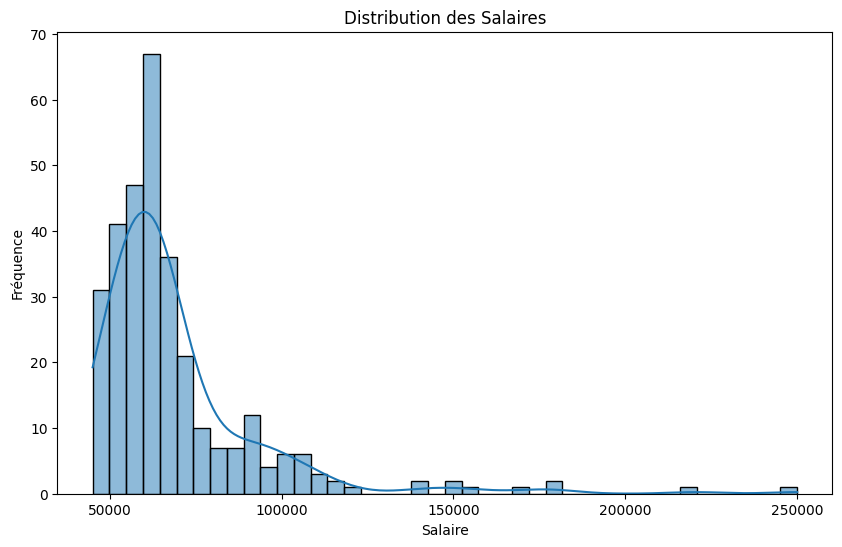

In [22]:
# Histogramme pour la distribution des salaires
plt.figure(figsize=(10, 6))
sns.histplot(df['Salaire'], kde=True)
plt.title('Distribution des Salaires')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.show()

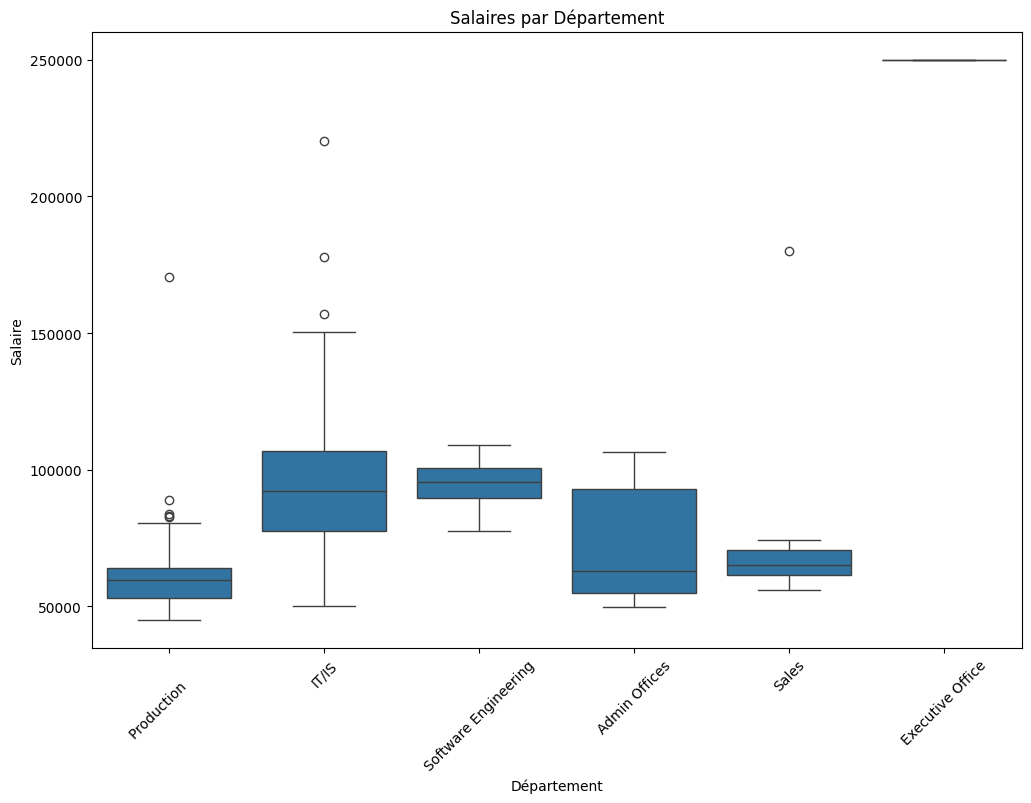

In [23]:
# Box plot pour les salaires par département
plt.figure(figsize=(12, 8))
sns.boxplot(x='Département', y='Salaire', data=df)
plt.title('Salaires par Département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.xticks(rotation=45)
plt.show()

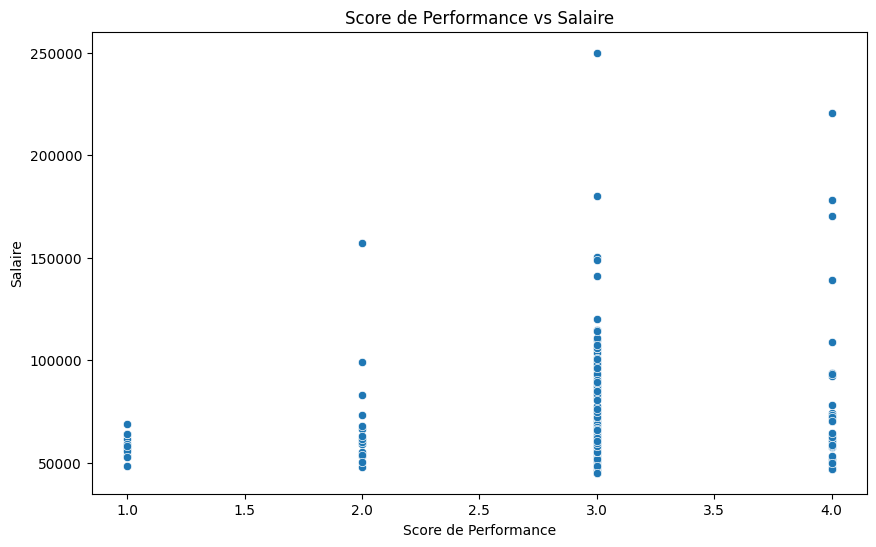

In [24]:
# Scatter plot pour la relation entre les scores de performance et les salaires
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ID_Score_Performance', y='Salaire', data=df)
plt.title('Score de Performance vs Salaire')
plt.xlabel('Score de Performance')
plt.ylabel('Salaire')
plt.show()

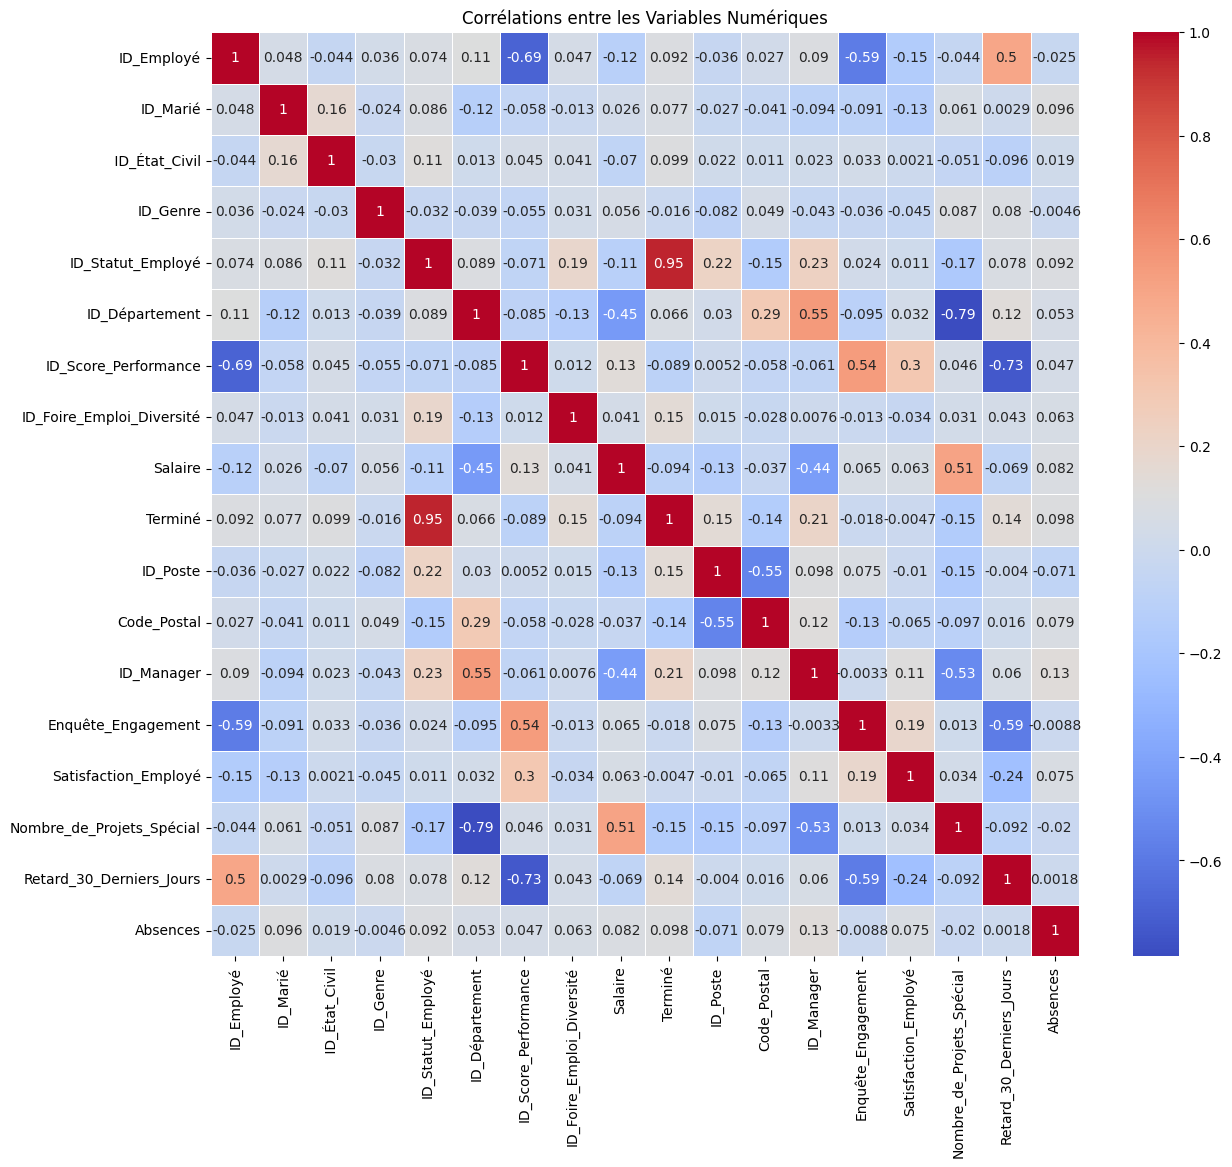

In [25]:
# Heatmap pour visualiser les corrélations entre les variables numériques

# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=[float, int])

# Calculer la matrice de corrélation
corr_matrix = numeric_df.corr()

# Afficher la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corrélations entre les Variables Numériques')
plt.show()

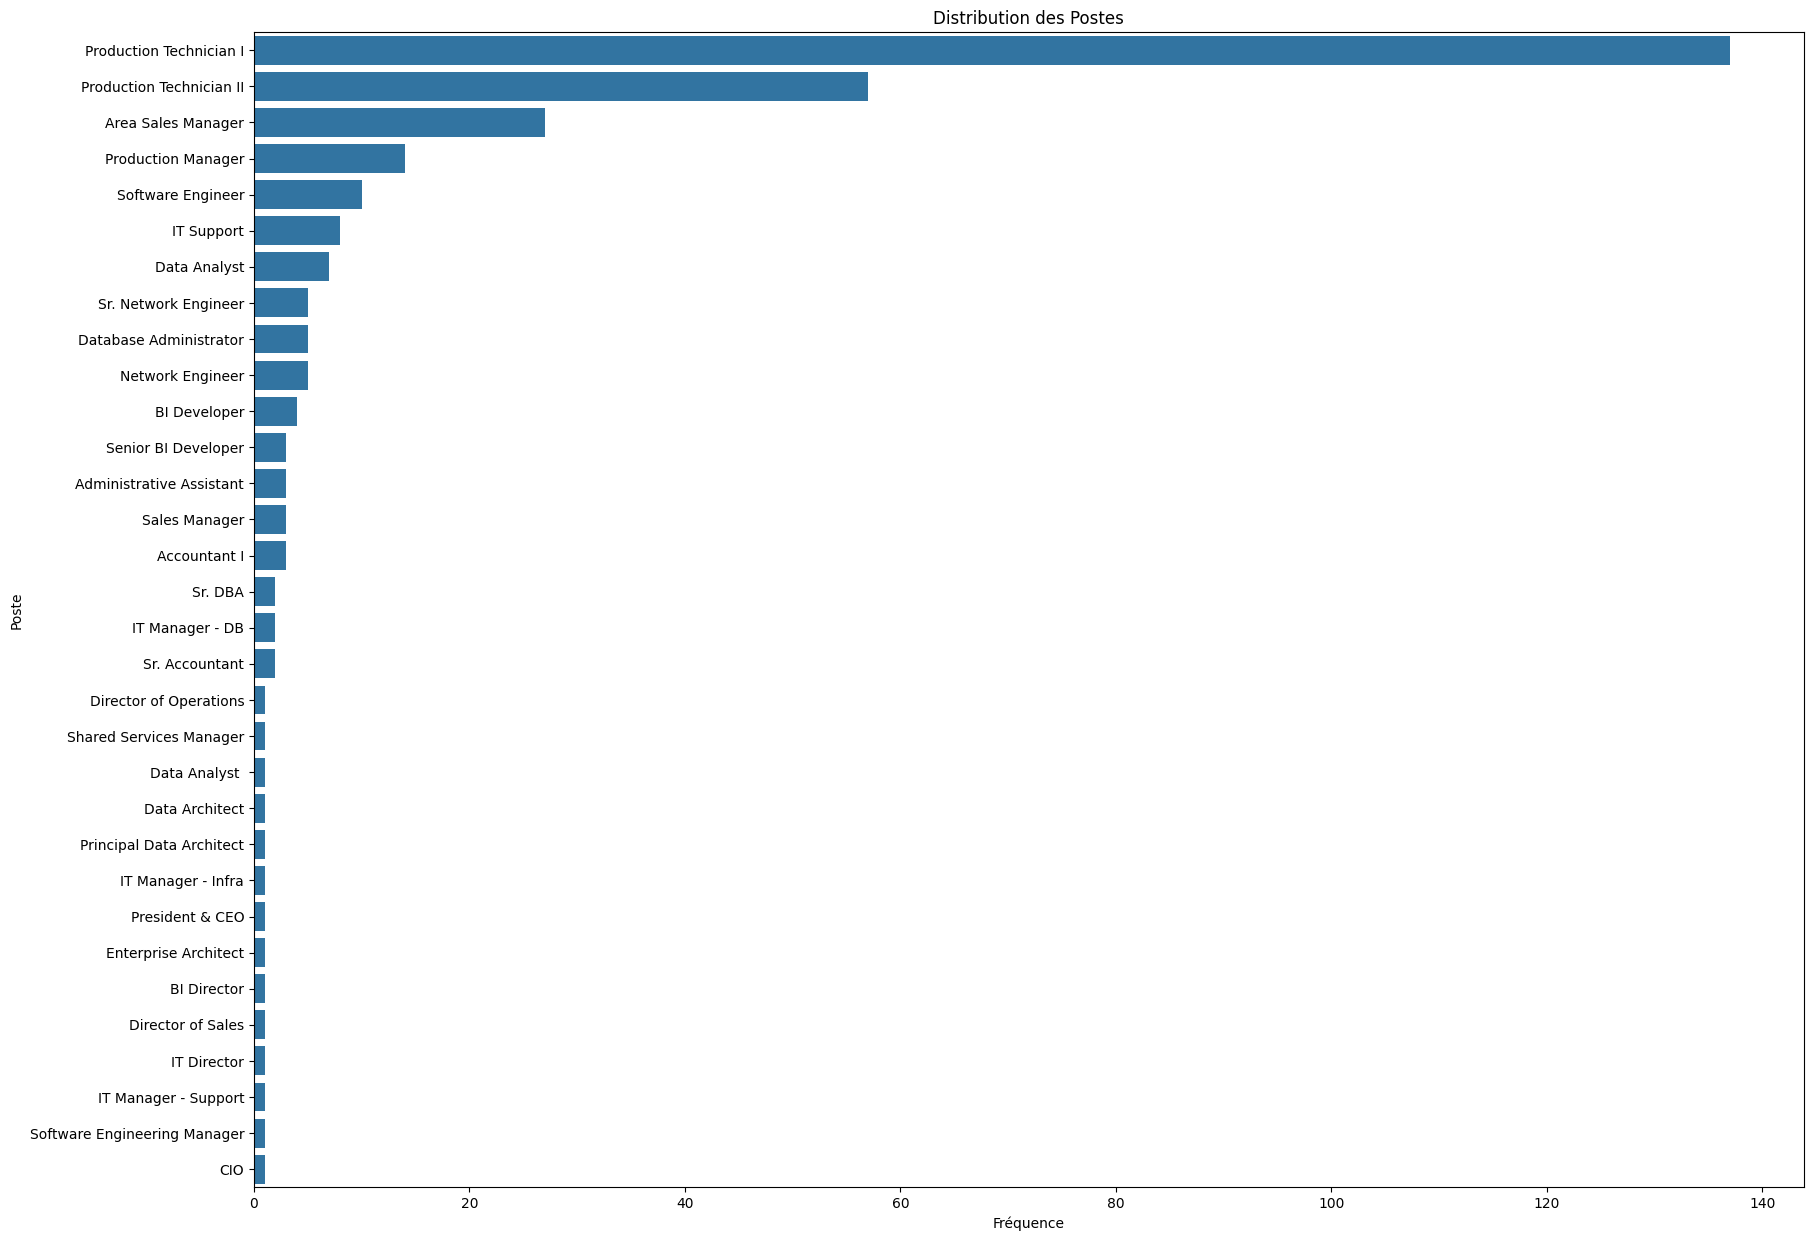

In [26]:
# Graphique à barres horizontales pour la distribution des Postes
plt.figure(figsize=(20, 15))
sns.countplot(y='Poste', data=df, order=df['Poste'].value_counts().index)
plt.title('Distribution des Postes')
plt.xlabel('Fréquence')
plt.ylabel('Poste')
plt.show()

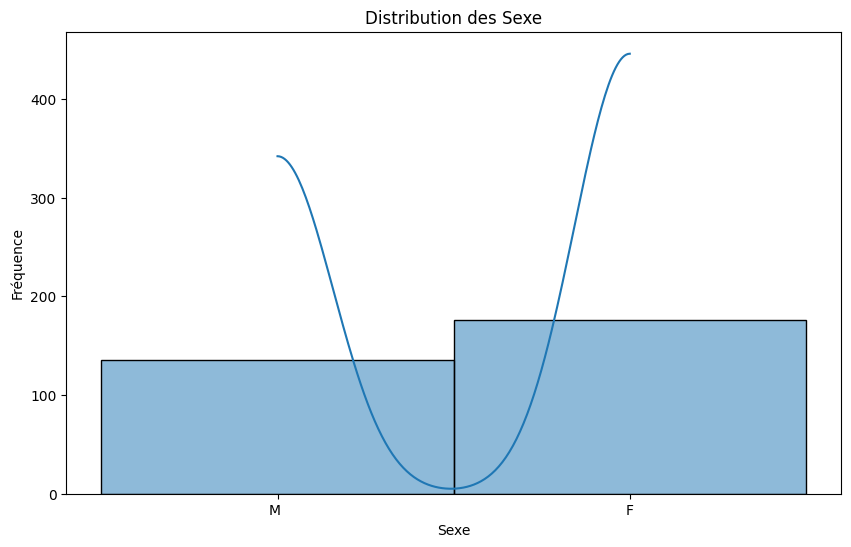

In [27]:
# Histogramme pour la distribution des sexes
plt.figure(figsize=(10, 6))
sns.histplot(df['Sexe'], kde=True)
plt.title('Distribution des Sexe')
plt.xlabel('Sexe')
plt.ylabel('Fréquence')
plt.show()

In [28]:
df.columns

Index(['Nom_Employé', 'ID_Employé', 'ID_Marié', ' ID_État_Civil', 'ID_Genre',
       'ID_Statut_Employé', 'ID_Département', 'ID_Score_Performance',
       'ID_Foire_Emploi_Diversité', 'Salaire', 'Terminé', 'ID_Poste', 'Poste',
       'État', 'Code_Postal', 'Date_de_Naissance', 'Sexe',
       'Description_État_Civil', 'Description_Citoyenneté', 'Hispano_Latino',
       'Description_Race', 'Date_Embauche', 'Date_de_Fin', 'Raison_de_Fin',
       'Statut_Emploi', 'Département', 'Nom_du_Manager', 'ID_Manager',
       'Source_de_Recrutement', 'Score_de_Performance', 'Enquête_Engagement',
       'Satisfaction_Employé', 'Nombre_de_Projets_Spécial',
       'Évaluation_Dernière_Performance', 'Retard_30_Derniers_Jours',
       'Absences'],
      dtype='object')

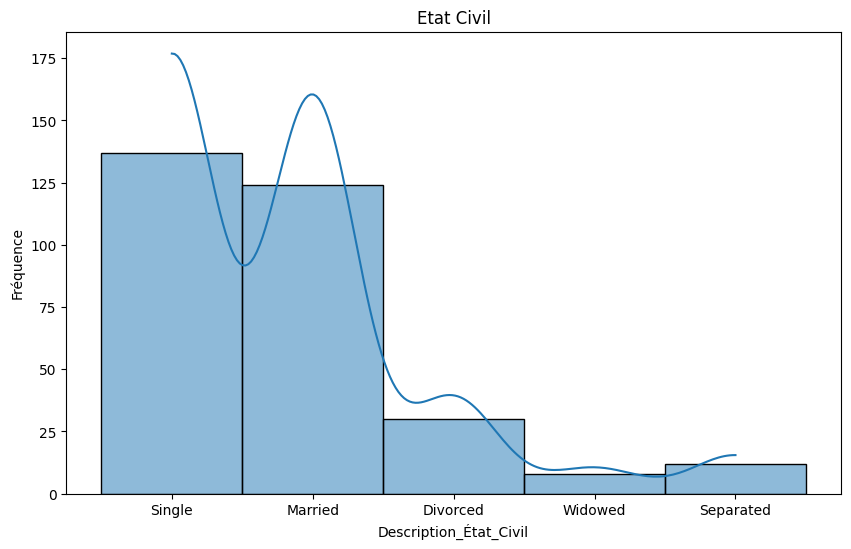

In [29]:
# Histogramme pour la distribution de l'État Civil
plt.figure(figsize=(10, 6))
sns.histplot(df['Description_État_Civil'], kde=True)
plt.title('Etat Civil')
plt.xlabel('Description_État_Civil')
plt.ylabel('Fréquence')
plt.show()

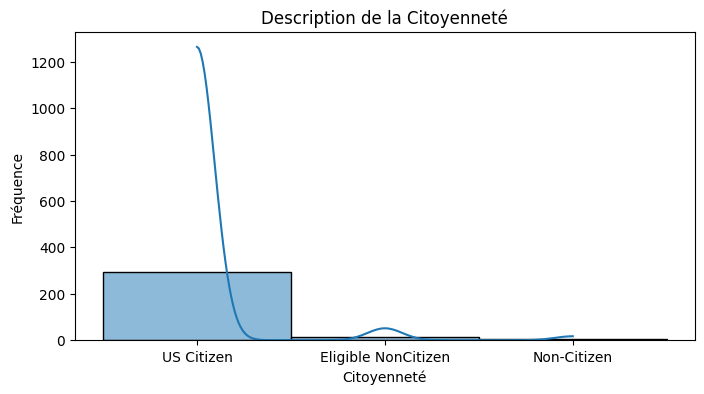

In [30]:
# Histogramme pour la Description de la Citoyenneté
plt.figure(figsize=(8, 4))
sns.histplot(df['Description_Citoyenneté'], kde=True)
plt.title('Description de la Citoyenneté')
plt.xlabel('Citoyenneté')
plt.ylabel('Fréquence')
plt.show()

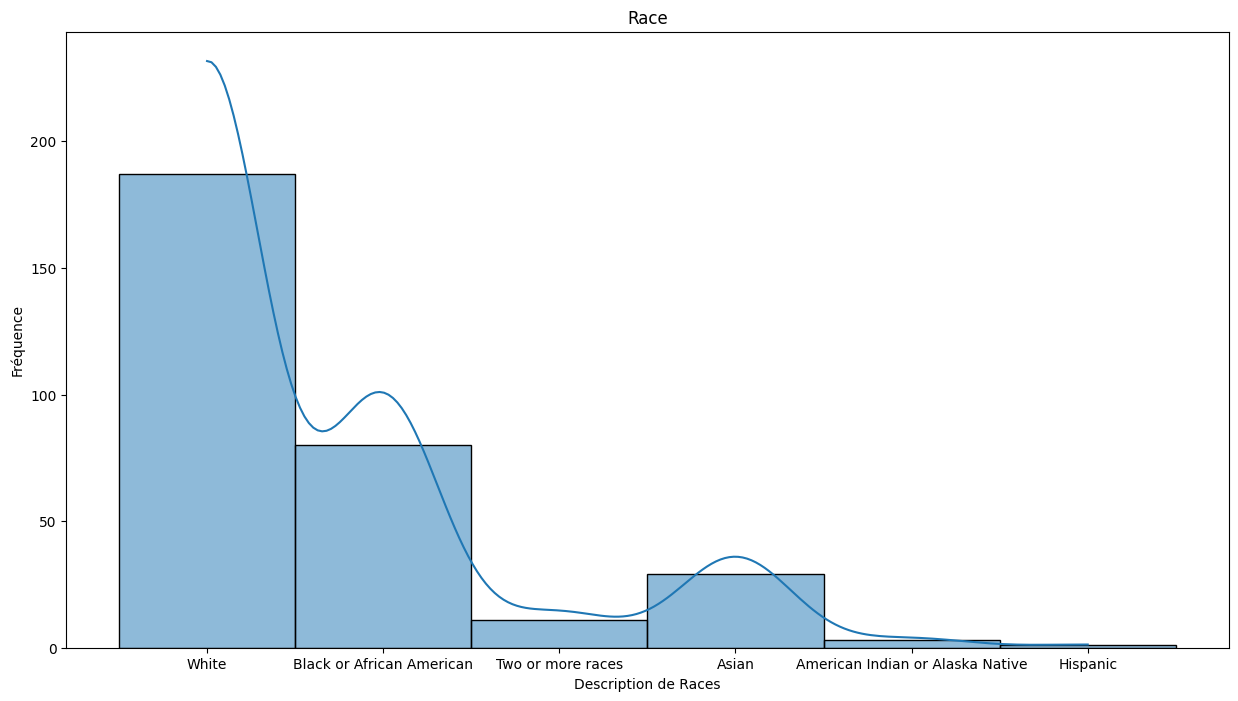

In [31]:
# Histogramme pour la Description de Race
plt.figure(figsize=(15, 8))
sns.histplot(df['Description_Race'], kde=True)
plt.title('Race')
plt.xlabel('Description de Races')
plt.ylabel('Fréquence')
plt.show()

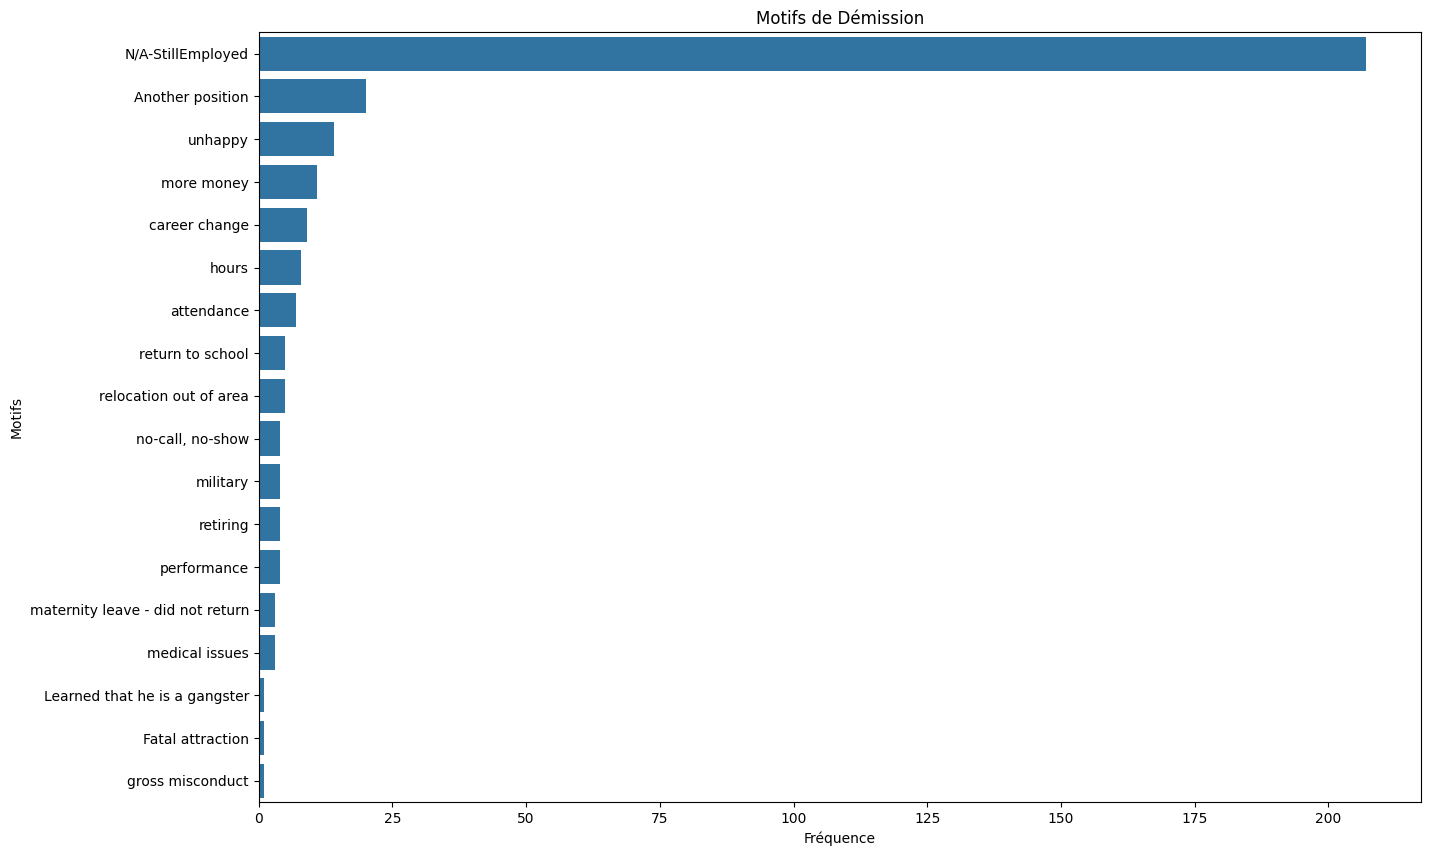

In [32]:
# Graphique à barres horizontales pour la distribution des Motifs de démission
plt.figure(figsize=(15, 10))
sns.countplot(y='Raison_de_Fin', data=df, order=df['Raison_de_Fin'].value_counts().index)
plt.title('Motifs de Démission')
plt.xlabel('Fréquence')
plt.ylabel('Motifs')
plt.show()

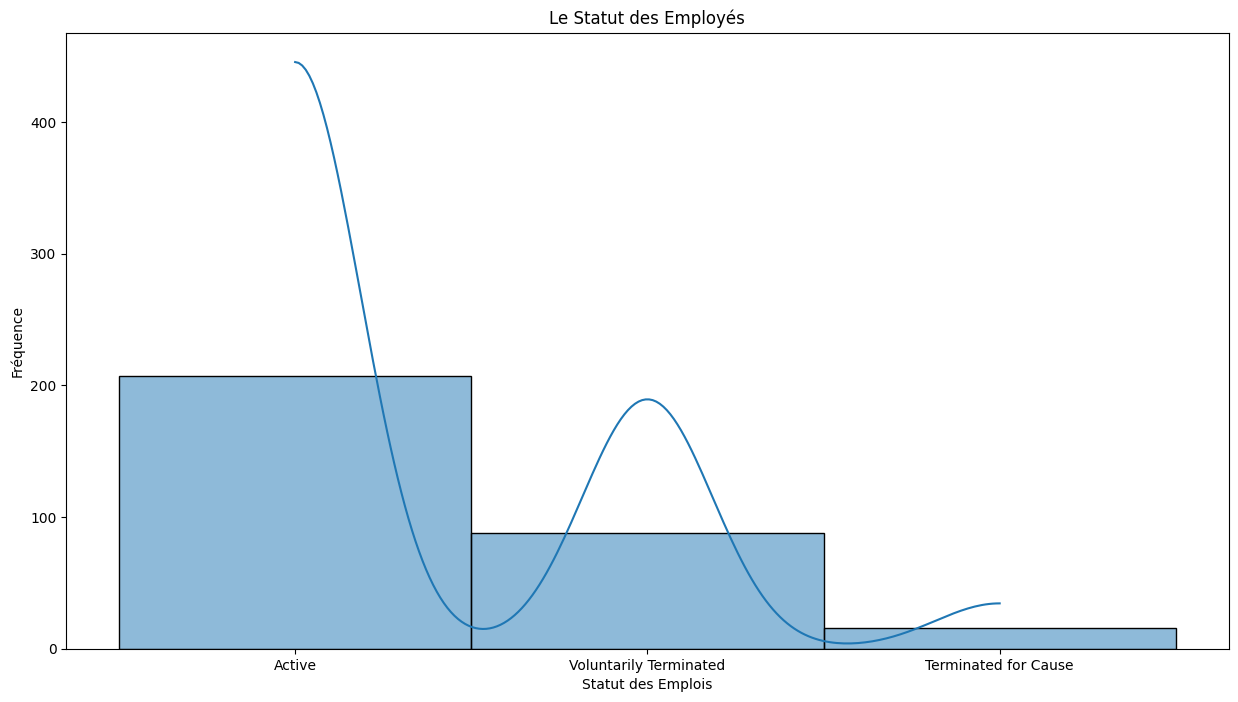

In [33]:
# Histogramme pour la Distribution du Statut des Employés
plt.figure(figsize=(15, 8))
sns.histplot(df['Statut_Emploi'], kde=True)
plt.title('Le Statut des Employés')
plt.xlabel('Statut des Emplois')
plt.ylabel('Fréquence')
plt.show()

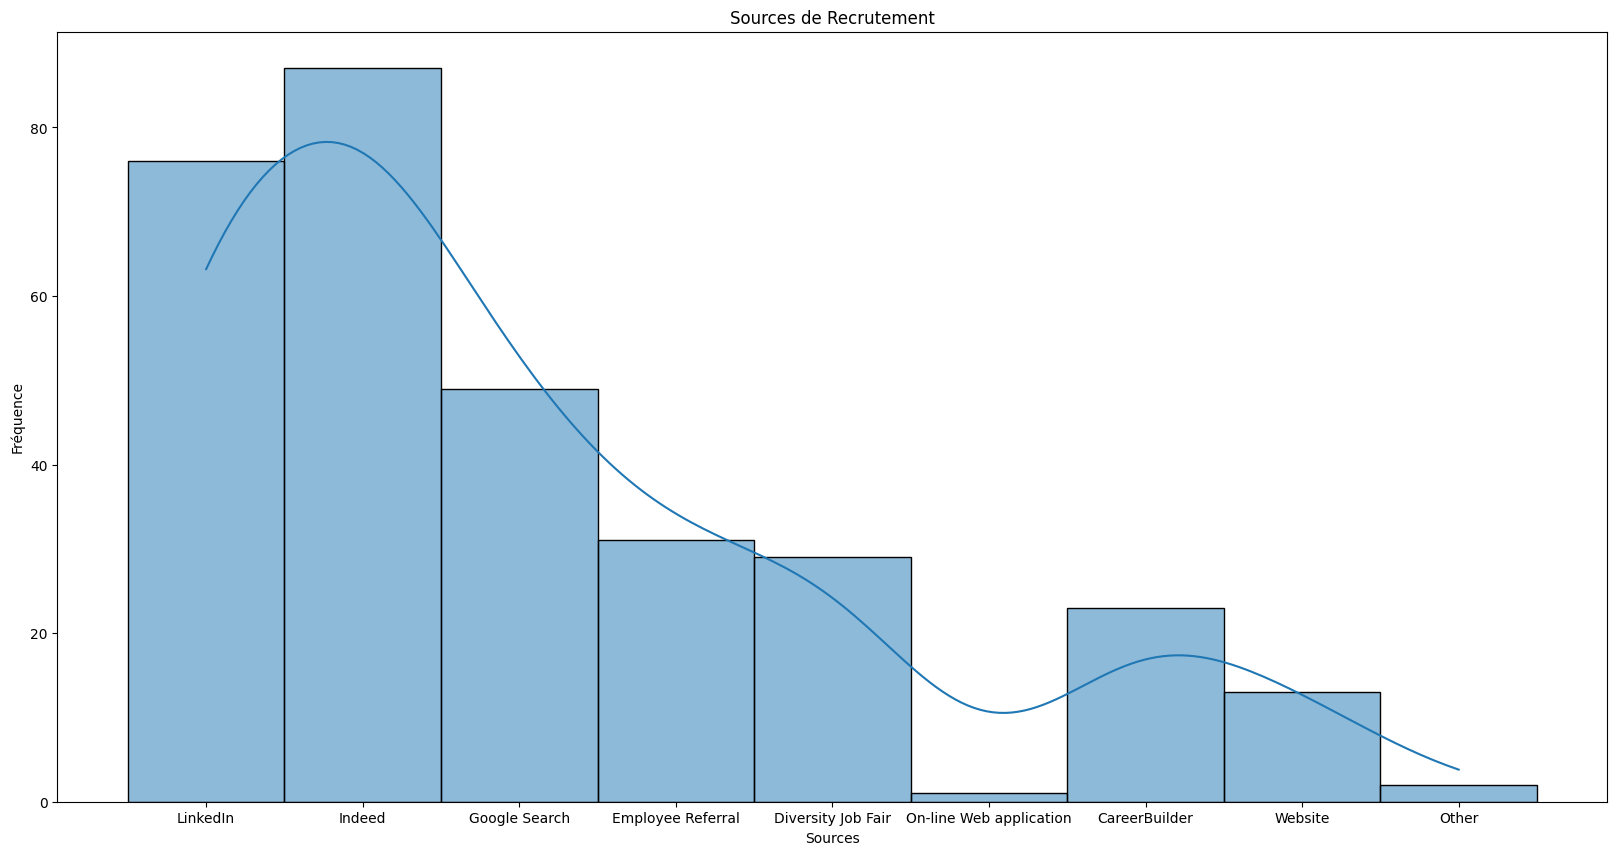

In [34]:
# Histogramme pour la Distribution des sources de recrutement
plt.figure(figsize=(20, 10))
sns.histplot(df['Source_de_Recrutement'], kde=True)
plt.title('Sources de Recrutement')
plt.xlabel('Sources')
plt.ylabel('Fréquence')
plt.show()

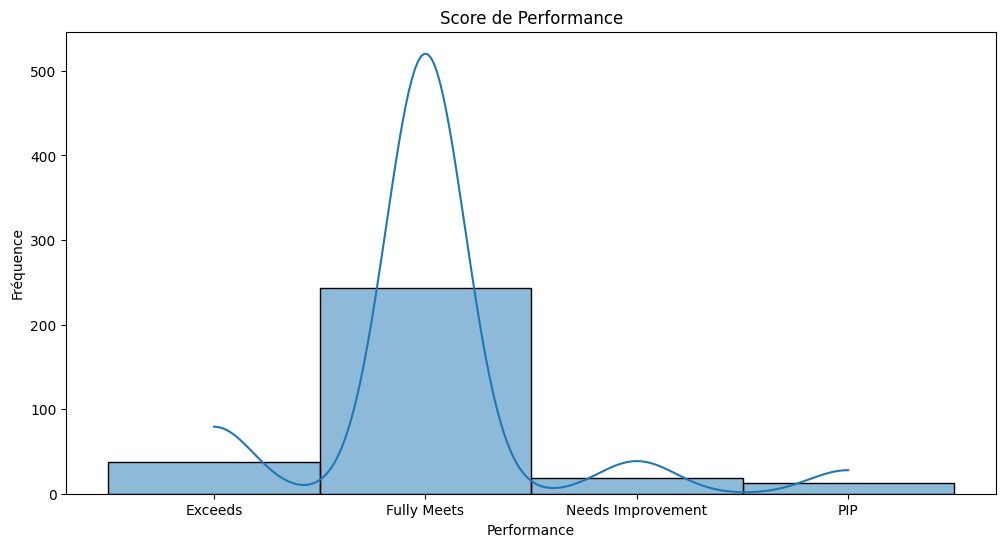

In [35]:
# Histogramme pour la Distribution des Scores de Performance
plt.figure(figsize=(12, 6))
sns.histplot(df['Score_de_Performance'], kde=True)
plt.title('Score de Performance')
plt.xlabel('Performance')
plt.ylabel('Fréquence')
plt.show()

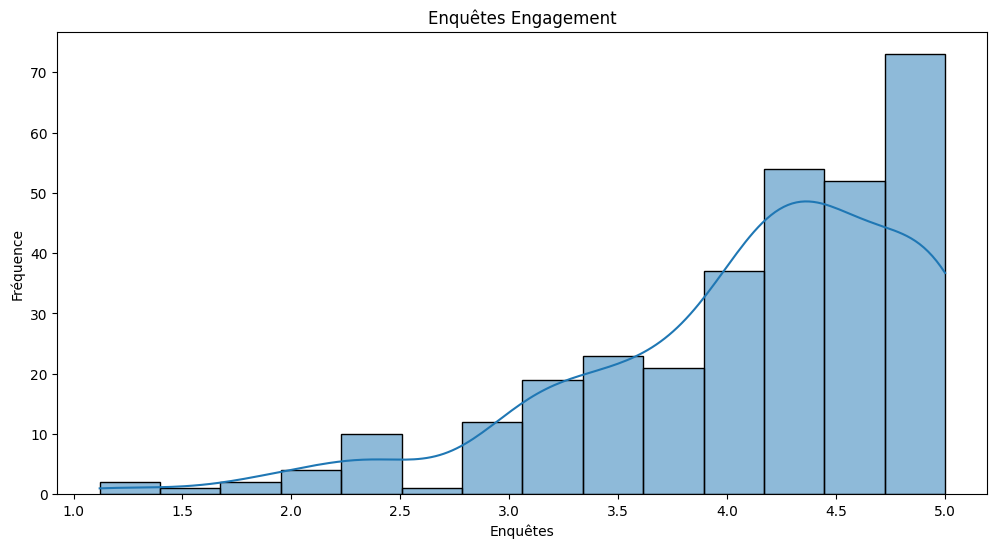

In [36]:
# Histogramme pour la visualisation d'enquêtes d'engagement
plt.figure(figsize=(12, 6))
sns.histplot(df['Enquête_Engagement'], kde=True)
plt.title('Enquêtes Engagement')
plt.xlabel('Enquêtes')
plt.ylabel('Fréquence')
plt.show()

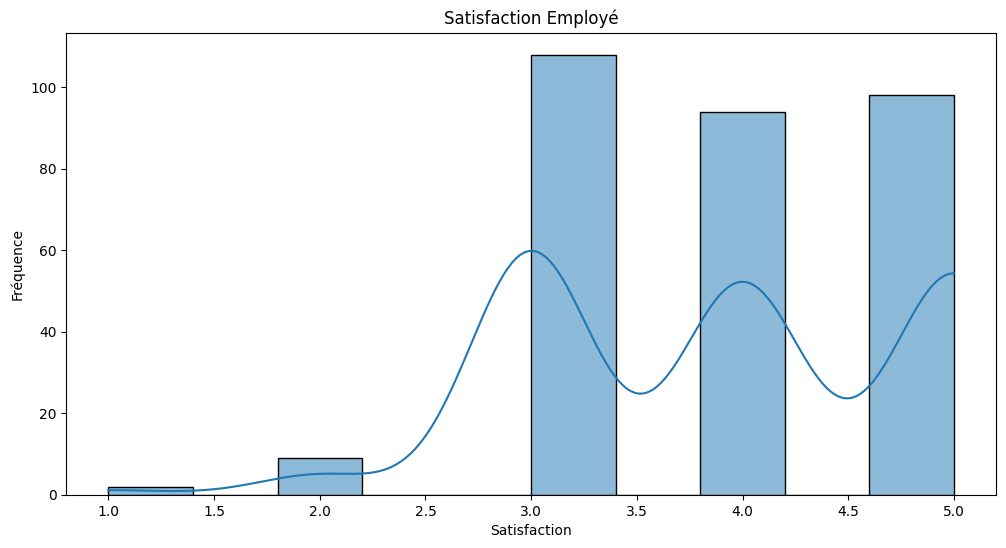

In [37]:
# Histogramme pour la Description de la Satisfaction Employé
plt.figure(figsize=(12, 6))
sns.histplot(df['Satisfaction_Employé'], kde=True)
plt.title('Satisfaction Employé')
plt.xlabel('Satisfaction')
plt.ylabel('Fréquence')
plt.show()

In [38]:
# variables catégorielles ordonnées
# Génération de données avec 311 noms uniques 
data = {
    'Nom_Employé': [f'Employé_{i}' for i in range(1, 312)],
    'Score_de_Performance': ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'],
    'Satisfaction_Employé': ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
}

In [42]:
# Tableau croisé et visualisation
cross_tab = pd.crosstab(df['Score_de_Performance'], df['Satisfaction_Employé'])
print("\nTableau Croisé entre 'Score_de_Performance' et 'Satisfaction_Employé':")
print(cross_tab)


Tableau Croisé entre 'Score_de_Performance' et 'Satisfaction_Employé':
Satisfaction_Employé  1  2   3   4   5
Score_de_Performance                  
Exceeds               0  0  11  11  15
Fully Meets           0  1  87  78  77
Needs Improvement     0  2   7   5   4
PIP                   2  6   3   0   2


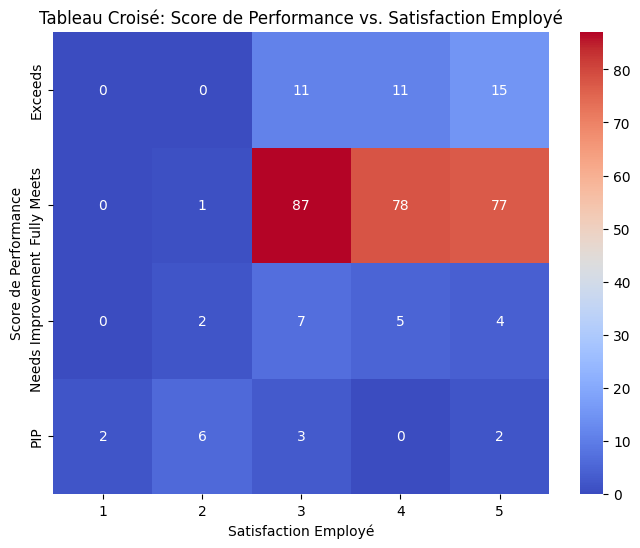

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Tableau Croisé: Score de Performance vs. Satisfaction Employé')
plt.xlabel('Satisfaction Employé')
plt.ylabel('Score de Performance')
plt.show()